## Compare corpus from URN


In [2]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn
%matplotlib inline

In [3]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

In [4]:
# lager et referansekorpus

refurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':200})

In [170]:
# lager et referansekorpus

refurns_filosofi = nb.get_urn({'year':1970, 'next':60, 'ddk':"808%", 'limit':200})
reference_philosopy = [r[0] for r in refurns_filosofi]

In [7]:
reference = [r[0] for r in refurns]

Selve korpusene bygges på forskjellige måter, her ved å sammenligne lettlest mot referanse 

In [8]:
lettlest = Corpus_urn(
    urns = urns,
    ref_urns = reference
)

En liten kommando for å sjekke ord mot kvinnekorpus og mannskorpus

In [9]:
def check(target="", reference="", vals=[
    '.'
]):
    #vals = ['hennes','hans','ham','hun','han','Han','Hun']
    kv = check_vals(target, vals)
    me = check_vals(reference, vals)
    me.columns = ['reference']
    kv.columns = ['target']
    return me.join(kv)

Plotter forskjellene på bestemte ord og undersøker korpuset den veien.

In [14]:
lettlest.difference()

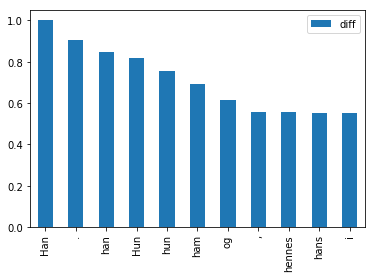

In [15]:
lettlest.search_words( ['hennes','hans','ham','hun','han','Han','Hun', '.', ',','og','i']).plot(kind='bar')

In [16]:
f = nb.get_corpus_text(urns)

In [18]:
nb.normalize_corpus_dataframe(f)

True

In [29]:
r = nb.get_corpus_text(reference)
nb.normalize_corpus_dataframe(r)

True

In [171]:
rfil = nb.get_corpus_text(reference_philosopy)
nb.normalize_corpus_dataframe(rfil)

True

In [27]:
fstat = f.transpose().describe()

In [30]:
rstat = r.transpose().describe()

In [173]:
rfilstat = rfil.transpose().describe()

In [31]:
rstat['.']

count    200.000000
mean       0.084651
std        0.041713
min        0.000000
25%        0.065390
50%        0.080743
75%        0.097636
max        0.452830
Name: ., dtype: float64

In [86]:
fstat['.']

count    81.000000
mean      0.110462
std       0.020922
min       0.071821
25%       0.097661
50%       0.109420
75%       0.126602
max       0.163251
Name: ., dtype: float64

In [174]:
rfilstat['.']

count    199.000000
mean       0.071157
std        0.023105
min        0.019843
25%        0.056834
50%        0.066185
75%        0.080278
max        0.157480
Name: ., dtype: float64

In [88]:
len(reference)

200

In [33]:
fstat['.']['count']

81.0

In [189]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
import numpy as np
import scipy.stats

def nplot(dfstat, value):
    

    mu = dfstat[value]['mean'] 
    sigma = dfstat[value]['std']
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax = plt.subplot(111)
    ax.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
    return ax

def twoplot(onestat, twostat, value, legends=['target', 'reference']):
    ax = plt.subplot(211)

    one_mu = onestat[value]["mean"]
    two_mu = twostat[value]["mean"]
    one_sigma = onestat[value]["std"]
    two_sigma = twostat[value]["std"]
    mu = (one_mu + two_mu)/2
    left_sigma = min(one_sigma, two_sigma)
    right_sigma = max(one_sigma, two_sigma)
    x =  np.linspace(mu - 4*left_sigma, mu + 4*right_sigma, 100)
    ax.plot(x, scipy.stats.norm.pdf(x, one_mu, one_sigma))
    #ax2 = plt.subplot(212, sharex=ax1)
    ax.plot(x, scipy.stats.norm.pdf(x, two_mu, two_sigma))
    ax.legend(legends)
    return ax

def histplot(fstat, value, bins=5, color='blue', axis = "", figsize=(30,8)):
    if axis == "":
        f = plt.figure(figsize=figsize)
        ax = f.add_subplot(121)
    else:
        ax = axis
    numBins = bins
    ax.hist(fstat[value].dropna(),density=True,bins=numBins, color=color,alpha=0.8)
    return ax



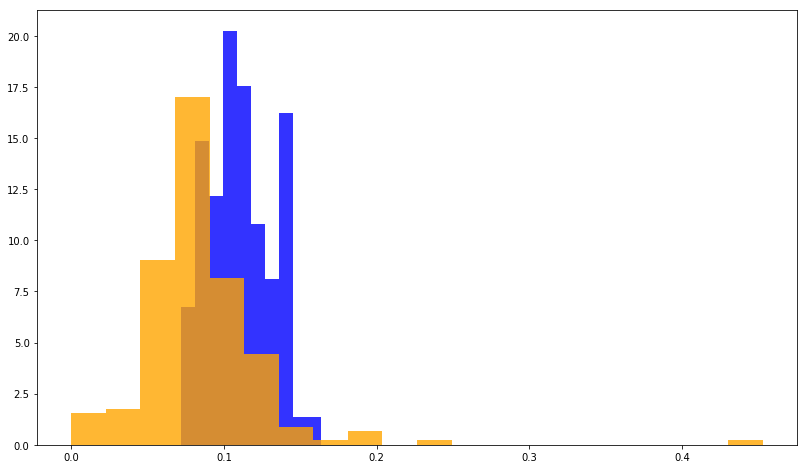

In [190]:
a = histplot(f.transpose(),'.', bins=10, color='blue', figsize=(30,8))
histplot(r.transpose(), '.', bins=20,color='orange', axis=a)

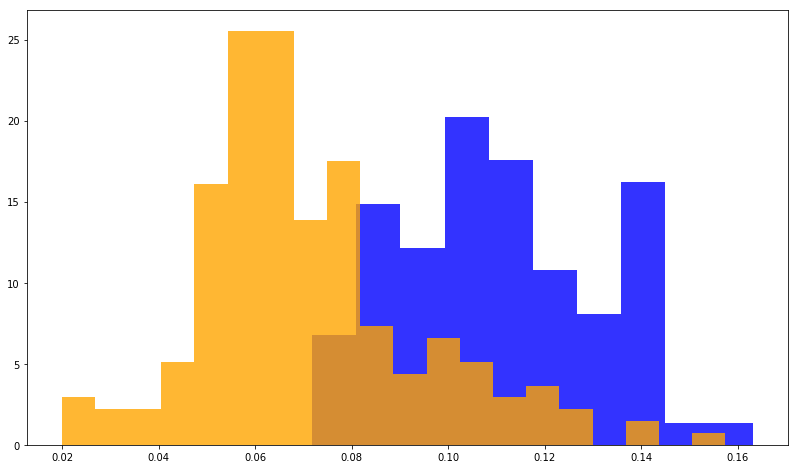

In [191]:
a = histplot(f.transpose(),'.', bins=10, color='blue', figsize=(30,8))
histplot(rfil.transpose(), '.', bins=20,color='orange', axis=a)

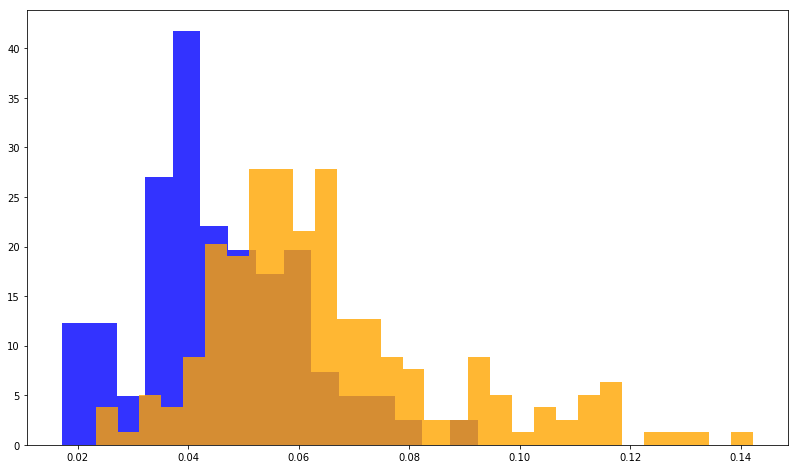

In [194]:
a = histplot(f.transpose(),',', bins=15, color='blue', figsize=(30,8))
histplot(rfil.transpose(), ',', bins=30,color='orange', axis=a)

(array([ 7., 10., 57., 54., 34., 15., 11.,  8.,  2.,  1.]),
 array([0.01984294, 0.03360668, 0.04737041, 0.06113415, 0.07489789,
        0.08866163, 0.10242536, 0.1161891 , 0.12995284, 0.14371658,
        0.15748031]),
 <a list of 10 Patch objects>)

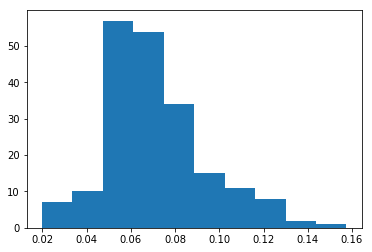

In [188]:
plt.hist(rfil.transpose().dropna()["."])

ValueError: max must be larger than min in range parameter.

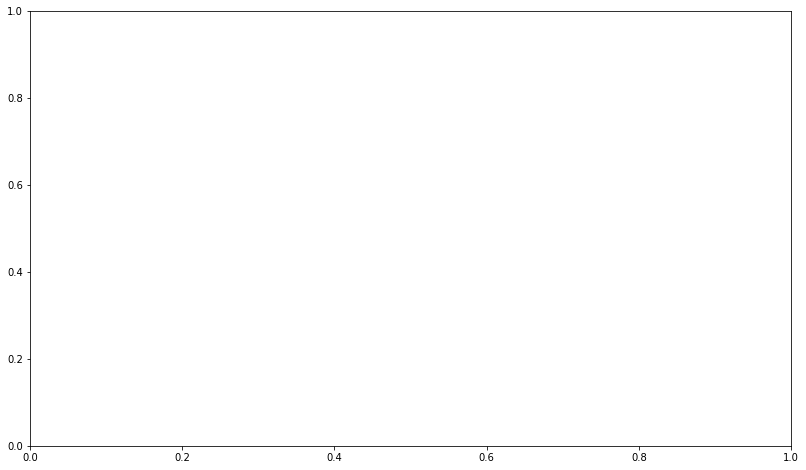

In [182]:
histplot(rfil.transpose(), '.', bins=20, color='orange')

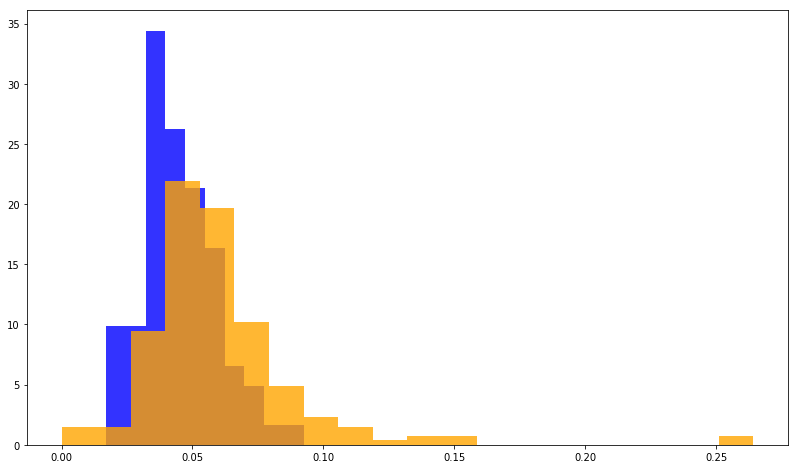

In [168]:
a = histplot(f.transpose(),',', bins=10, color='blue')
histplot(r.transpose(), ',', bins=20,color='orange', axis=a)

In [138]:
histplot(r.transpose(), '.', bins=10, axis=a)

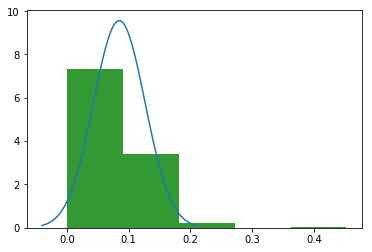

In [143]:
a = nplot(rstat, '.')
histplot(r.transpose(), '.', axis=a)

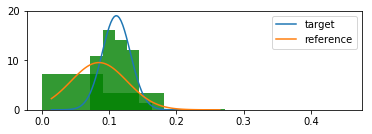

In [144]:
ax = twoplot(fstat,rstat, '.')
histplot(r.transpose(), '.', axis=ax)
histplot(f.transpose(), '.', axis=ax)

In [113]:
f.transpose()['.']

2010050408081    0.114946
2008030604009    0.112407
2010052003119    0.106662
2008020804058    0.089861
2008011000089    0.110510
2009093004032    0.136331
2009030304067    0.086149
2007081300029    0.110928
2012121105068    0.118251
2007111301009    0.109420
2007081004056    0.143159
2013013006060    0.132098
2012092705081    0.081505
2012112808086    0.104095
2012112808117    0.112111
2012121007004    0.104280
2014070905019    0.101090
2012062505048    0.152672
2012092705069    0.115217
2012092706103    0.115355
2010050503036    0.100346
2009042004082    0.133888
2010022303036    0.088735
2011070708028    0.079025
2013082808049    0.137359
2011060106065    0.113386
2013061108167    0.133129
2011060606073    0.071821
2011071308024    0.098249
2009021004116    0.143192
                   ...   
2013012506031    0.100455
2013110405040    0.097661
2013103006006    0.077832
2014071107075    0.081612
2013022506121    0.089180
2013010408136    0.090683
2013041206092    0.097749
201304250600

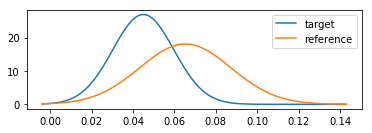

In [180]:
twoplot(fstat,rfilstat, ',')

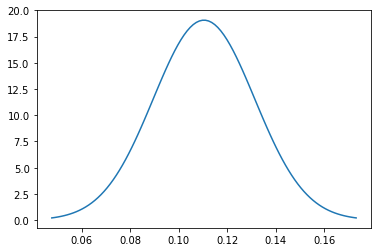

In [118]:
nplot(fstat, '.')

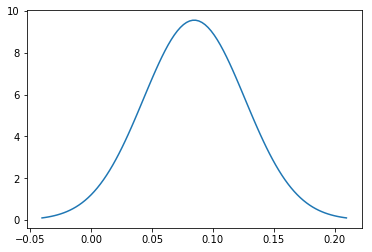

In [119]:
nplot(rstat, '.')